# Password Strength Prediction Using NLP

***This notebook contains Data Loading, Exploration, and Feature Engineering.***

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data from sqlite3

In [2]:
import sqlite3
conn = sqlite3.connect(r'/Users/suyog/Desktop/Password_Strength/Data/password_data.sqlite')

df = pd.read_sql('SELECT * FROM Users', conn)

In [3]:
df.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


## Baisc Data Structure

In [4]:
df.shape

(100000, 3)

In [5]:
df.columns

Index(['index', 'password', 'strength'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


## Data Cleaning

#### Removing index from df

In [7]:
df.drop(['index'], axis=1, inplace=True)

#### Checking for duplicate values

In [8]:
df.duplicated().sum()

np.int64(0)

#### Checking for missing values

In [9]:
df.isnull().sum()

password    0
strength    0
dtype: int64

##### Checking for empty passwords

In [10]:
(df['password'].str.len() == 0).sum()

np.int64(0)

## Visualizing Class Distributions

In [11]:
df['strength'].value_counts()

strength
1    73883
0    13622
2    12495
Name: count, dtype: int64

In [12]:
# percentage of samples in each class (0, 1, 2)
df['strength'].value_counts(normalize=True) * 100

strength
1    73.883
0    13.622
2    12.495
Name: proportion, dtype: float64

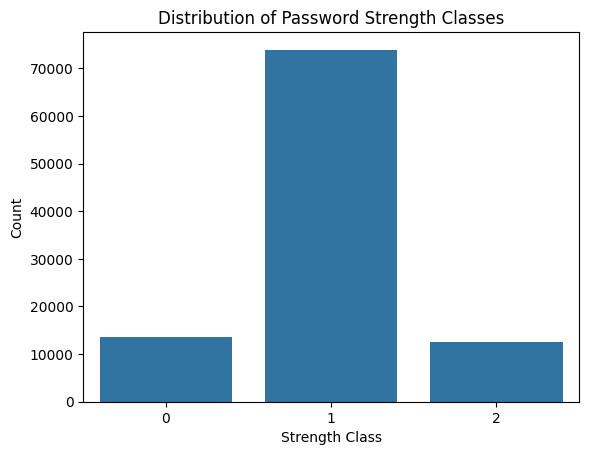

In [13]:
sns.countplot(data=df, x='strength')
plt.title('Distribution of Password Strength Classes')
plt.xlabel('Strength Class')
plt.ylabel('Count')
plt.show()

**It seems that medium passwords (class 1) are the most frequent in the dataset. Medium Passwords account for almost 74% of all passwords in the dataset.**

## Manual Passwords Exploration

In [14]:
# samples of weak passwords
df[df['strength'] == 0]['password'].sample(10)

22743    forku09
5753     nanana1
12649     dani97
71010     mr1998
61325     pato77
88423    kufer21
9635      pp63ta
87739     pacar5
67286     ddd069
63404    enero02
Name: password, dtype: object

In [15]:
# samples of medium passwords
df[df['strength'] == 1]['password'].sample(10)

92643     yk1s4tn6sgzw
8624        agosto2284
1808         marcador1
61182         lapapa36
28997    0847493073sai
21679         idema493
23122       hungri1356
26697     iagochan2005
65612       nx7svbfukk
33343       ohevulu182
Name: password, dtype: object

In [16]:
# samples of strong passwords
df[df['strength'] == 2]['password'].sample(10)

33132       9zLR2jzUxMAxrKqS
68286       SQN8JPTczMwys1W4
47725    amoremoreorere2012!
98870       V0kaI0TMwMwcrMny
14255       nAzARpDE1NA2LTlj
5332        RO83xojA0OQQRwJh
11582       DDSOTJjg3OQ6L89T
49750       B172uUTM2MAxdpGZ
67543       E6KKVqzQwMgkEbdm
89976       vuPo6ijk2NQzaI4n
Name: password, dtype: object

## Semantic Analysis

#### No of passwords with only numeric characters

In [17]:
df[df['password'].str.isnumeric()].shape

(26, 2)

#### No of passwords with only upper-case characters

In [18]:
df[df['password'].str.isupper()].shape

(1506, 2)

#### No of passwords with only lower-case characters

In [19]:
df[df['password'].str.islower()].shape

(86678, 2)

#### No of passwords with alpha-numeric characters

In [20]:
df[df['password'].str.isalnum()].shape

(97203, 2)

#### No of passwords with title-case characters

In [21]:
df[df['password'].str.istitle()].shape

(932, 2)

#### No of passwords with some special characters

In [22]:
# function: find_special_chars -> returns 1 if any character in a single password is special
import string

def find_special_chars(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [23]:
df[df['password'].apply(find_special_chars) == 1].shape

(2663, 2)

## Feature Engineering

Password Strength depends on 5 factors (google):
    
Length of password
    
Frequency of Lowercase Characters
    
Frequency of Uppercase Characters
    
Frequency of Numeric Characters
    
Frequency of Special Characters

#### Extracting features from each password

In [24]:
# function: extract_features -> extracting features from a password
def extract_features(password):
    length = len(password)
    digits = sum(c.isdigit() for c in password)
    upper = sum(c.isupper() for c in password)
    lower = sum(c.islower() for c in password)
    special = sum(not c.isalnum() for c in password)

    digit_freq = digits / length if length > 0 else 0
    upper_freq = upper / length if length > 0 else 0
    lower_freq = lower / length if length > 0 else 0
    special_freq = special / length if length > 0 else 0

    return pd.Series([
        length, digits, upper, lower, special, digit_freq, upper_freq, lower_freq, special_freq
    ])

In [25]:
df[['length', 'digits', 'upper', 'lower', 'special', 'digit_freq', 
    'upper_freq', 'lower_freq', 'special_freq']] = np.round(df['password'].apply(extract_features), 3)

In [26]:
df.head()

,password,strength,length,digits,upper,lower,special,digit_freq,upper_freq,lower_freq,special_freq
0,zxe870819,1,9.0,6.0,0.0,3.0,0.0,0.667,0.0,0.333,0.000
1,xw46454nr23l,1,12.0,7.0,0.0,5.0,0.0,0.583,0.0,0.417,0.000
2,soporte13,1,9.0,2.0,0.0,7.0,0.0,0.222,0.0,0.778,0.000
3,accounts6000webhost.com,2,23.0,4.0,0.0,18.0,1.0,0.174,0.0,0.783,0.043
4,c443balg,1,8.0,3.0,0.0,5.0,0.0,0.375,0.0,0.625,0.000


## Comparing Features Across Classes

#### Computing descriptive stats (mean, median, max, min)

In [27]:
print('Mean')
print(df.groupby('strength')[[
    'length','digits','upper','lower','special',
    'digit_freq', 'upper_freq', 'lower_freq', 'special_freq'
]].mean())
print('\n')
print('Median')
print(df.groupby('strength')[[
    'length','digits','upper','lower','special',
    'digit_freq', 'upper_freq', 'lower_freq', 'special_freq'
]].median())

Mean
             length    digits     upper     lower   special  digit_freq  \
strength                                                                  
0          6.550947  1.773528  0.082587  4.671267  0.023565    0.275383   
1          9.611074  3.448073  0.076784  6.067431  0.018786    0.360123   
2         15.953421  3.069868  5.836415  6.813045  0.234094    0.193796   

          upper_freq  lower_freq  special_freq  
strength                                        
0           0.012872    0.708050      0.003696  
1           0.007915    0.630067      0.001895  
2           0.367633    0.424679      0.013867  


Median
          length  digits  upper  lower  special  digit_freq  upper_freq  \
strength                                                                  
0            7.0     2.0    0.0    5.0      0.0       0.286       0.000   
1            9.0     3.0    0.0    6.0      0.0       0.333       0.000   
2           16.0     3.0    6.0    6.0      0.0       0.188      

## Visualizing Feature Trends using Boxplot

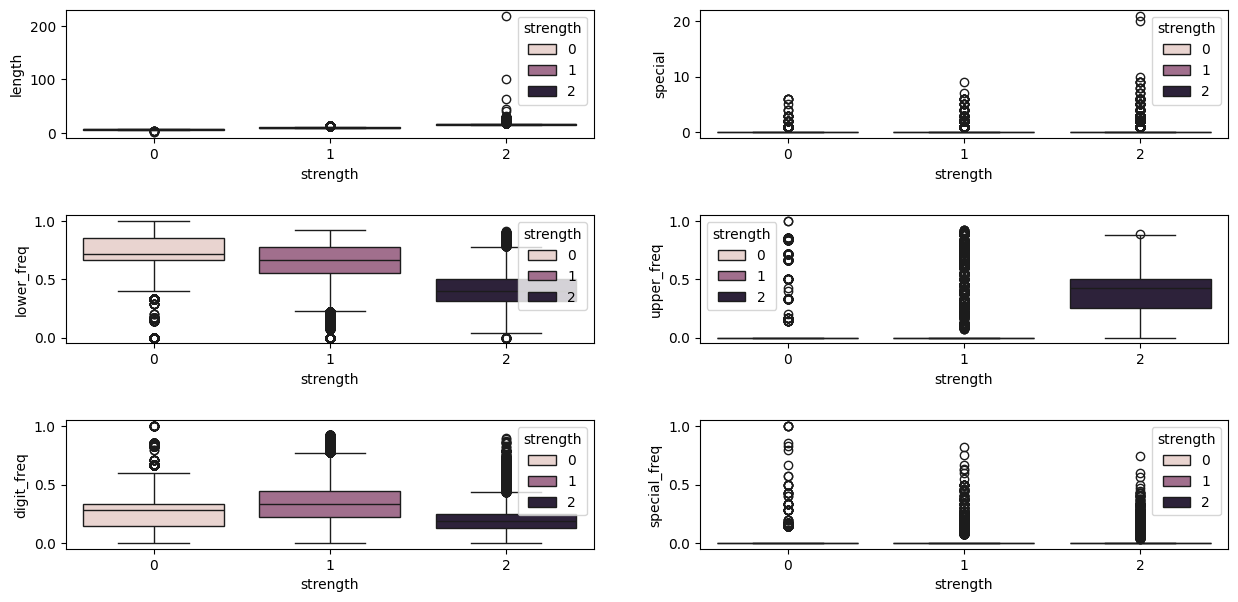

In [28]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))
sns.boxplot(x='strength' , y='length' , hue='strength' , ax=ax1 , data=df)
sns.boxplot(x='strength' , y='special' , hue='strength' , ax=ax2, data=df)
sns.boxplot(x='strength' , y='lower_freq' , hue='strength' , ax=ax3, data=df)
sns.boxplot(x='strength' , y='upper_freq' , hue='strength' , ax=ax4, data=df)
sns.boxplot(x='strength' , y='digit_freq' , hue='strength' , ax=ax5, data=df)
sns.boxplot(x='strength' , y='special_freq' , hue='strength' , ax=ax6, data=df)

plt.subplots_adjust(hspace=0.6)
plt.show()

***Observations:*** 

Strong passwords have significantly higher average length.

Strong passwords contain more special characters and uppercase letters.

Weak passwords have very low digit and special character ratios.

## NLP Vectorization: Applying TF-IDF 

***TF-IDF Design Choice:***

Since passwords do not follow natural language structure, character-level TF-IDF with n-grams was used instead of word-level vectorization. This captures meaningful patterns such as digit-symbol combinations and repeated character sequences.

#### Separating feature and target

In [29]:
X_text = df['password']
y = df['strength']

#### Splitting into train/test dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42, stratify=y)

#### Creating the vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    analyzer='char',          # character level to capture symbol patterns
    ngram_range=(2, 5),       # sequence of 2-5 characters
    min_df=5                  # removing noise; ignoring patterns that appear in fewer than 5 passwords 
)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [32]:
X_train.shape

(80000, 51808)

**Here, the model learns over 50,000 character-level patterns for X_train.**

#### Looking at some learned character patterns

In [33]:
tfidf.get_feature_names_out()[:30]

array([' 1', ' 12', ' 123', ' 19', ' 2', ' 9', ' a', ' b', ' k', ' l',
       '!!', '!!!', '!#', '!0', '!@', '!@#', '!@#$', '##', '#$', '#$%',
       '#1', '#3', '#30', '#305', '#305;', '$#', '$$', '$$$', '$%', '$%^'],
      dtype=object)

## Feature Fusion: Combining with other features

#### Merging the vector and other custom features

In [34]:
from scipy.sparse import hstack

custom_features = df[[
    'length', 'digits', 'upper', 'lower', 'special',
    'digit_freq', 'upper_freq', 'lower_freq', 'special_freq'
]]

# splitting the custom features using same indices as used above to split train and test data
# ignoring y because it was already split earlier
X_custom_train, X_custom_test, _, _ = train_test_split(custom_features, y, test_size=0.2, random_state=42, stratify=y)

X_train = hstack([X_train, X_custom_train.values])
X_test = hstack([X_test, X_custom_test.values])

In [35]:
# the final feature matrix 
X_train.shape

(80000, 51817)

***Feature Engineering Summary:***

Extracted 9 handcrafted statistical features

Applied character-level TF-IDF with n-grams (2–5)

These features will be used for downstream model training

## Saving Feature Matrix and Vectorizer

#### Using joblib to save X matrix, y, and vectorizer (tfidf) to use in modelling

In [36]:
import joblib

joblib.dump(X_train, '../Artifacts/X_train.pkl')
joblib.dump(X_test, '../Artifacts/X_test.pkl')
joblib.dump(y_train, '../Artifacts/y_train.pkl')
joblib.dump(y_test, '../Artifacts/y_test.pkl')
joblib.dump(tfidf, '../Artifacts/tfidf_vectorizer.pkl')

['../Artifacts/tfidf_vectorizer.pkl']